# dataset download

In [ ]:
import os

os.getcwd()


os.environ["KAGGLE_CONFIG_DIR"] = "/content/"


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!pip install Kaggle

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
os.chdir("/content/")
!kaggle datasets download -d arjuntejaswi/plant-village

 98% 321M/329M [00:07<00:00, 26.9MB/s]
100% 329M/329M [00:07<00:00, 47.1MB/s]


In [ ]:
!unzip plant-village.zip

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Cur

In [ ]:
!rm -rf /content/PlantVillage/Tomato_healthy/

In [ ]:
!rm -rf /content/PlantVillage/Tomato__Tomato_mosaic_virus/

In [ ]:
!rm -rf /content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/

In [ ]:
!rm -rf /content/PlantVillage/Tomato__Target_Spot/

In [ ]:
!rm -rf /content/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/

In [ ]:
!rm -rf /content/PlantVillage/Tomato_Septoria_leaf_spot/

In [ ]:
!rm -rf /content/PlantVillage/Tomato_Leaf_Mold/

In [ ]:
!rm -rf /content/PlantVillage/Tomato_Late_blight/

In [ ]:
!rm -rf /content/PlantVillage/Tomato_Early_blight/

In [ ]:
!rm -rf /content/PlantVillage/Tomato_Bacterial_spot/

In [ ]:
!rm -rf /content/PlantVillage/Pepper__bell___healthy/

In [ ]:
!rm -rf /content/PlantVillage/Pepper__bell___Bacterial_spot/

In [ ]:
!rm -rf /content/PlantVillage/.ipynb_checkpoints/

In [ ]:
!rm plant-village.zip

In [ ]:
# # download folder to disk
# !zip -r /content/PlantVillage.zip /content/PlantVillage

# from google.colab import files
# files.download("/content/PlantVillage.zip")


importing essential libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [ ]:
# create constant variables
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle= True,
    image_size= (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)

Found 2152 files belonging to 3 classes.


In [ ]:
os.getcwd()

'/content'

In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

In [ ]:
68*32

2176

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 0 0 0 1 1 1 0 1 1 0 1 2 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1]


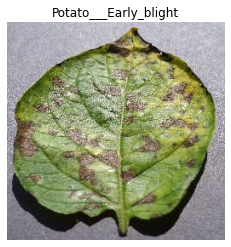

In [ ]:
# printing the first image

for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(class_names[label_batch[0]])
  plt.axis("off")

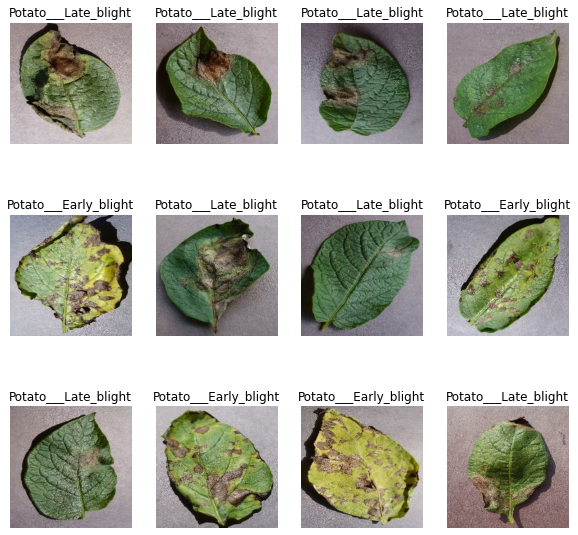

In [ ]:
# display 12 images

plt.figure(figsize= (10, 10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
len(dataset)

68

80% --> training

20% --> 10% validation(tested against while training), 10% test(tested against after we trained a model).

In [ ]:
# splitting in tf, use dataset.take
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)


54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
# function to get dataet partitions
def get_dataset_partitions_tf(df, train_split= 0.8, val_split= 0.1, test_split= 0.1, shuffle= True, shuffle_size= 10000):
  
  assert (train_split + test_split + val_split) == 1

  ds = dataset

  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed= 12)
  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)
  
  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

Cache, SHuffle and prefetch the dataset

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

# BUILDING MODEL

# Creating layer for resizing and normalization

to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

In [ ]:
resize_rescale = tf.keras.Sequential([
                     layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
                     layers.experimental.preprocessing.Rescaling(1.0/255)
])

Data Augmetation

In [ ]:
data_augmentation = tf.keras.Sequential([
                                         layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                                         layers.experimental.preprocessing.RandomRotation(0.2)
])

build model using cnn

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
                           resize_rescale,
                           data_augmentation,
                           layers.Conv2D(32, (3,3), activation= "relu", input_shape = input_shape),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64, (3,3), activation= "relu"),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64, (3,3), activation= "relu"),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Flatten(),
                           layers.Dense(64, activation= "relu"),
                           layers.Dense(n_classes, activation= "softmax"),   #softmax normalizes prob of the classes



])

model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

compile model

In [ ]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics = ["accuracy"]
)

model fitting

In [ ]:
history = model.fit(
    train_ds,
    epochs= EPOCHS,
    batch_size= BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 26s 195ms/step - loss: 0.9113 - accuracy: 0.5231 - val_loss: 0.8784 - val_accuracy: 0.6302
Epoch 2/50
54/54 [==============================] - 7s 134ms/step - loss: 0.6488 - accuracy: 0.7205 - val_loss: 0.5541 - val_accuracy: 0.7500
Epoch 3/50
54/54 [==============================] - 7s 134ms/step - loss: 0.4178 - accuracy: 0.8218 - val_loss: 0.4394 - val_accuracy: 0.8177
Epoch 4/50
54/54 [==============================] - 7s 134ms/step - loss: 0.2896 - accuracy: 0.8837 - val_loss: 0.3052 - val_accuracy: 0.8281
Epoch 5/50
54/54 [==============================] - 7s 134ms/step - loss: 0.2782 - accuracy: 0.8843 - val_loss: 0.3558 - val_accuracy: 0.8542
Epoch 6/50
54/54 [==============================] - 7s 134ms/step - loss: 0.2307 - accuracy: 0.9126 - val_loss: 0.2616 - val_accuracy: 0.8802
Epoch 7/50
54/54 [==============================] - 7s 136ms/step - loss: 0.2070 - accuracy: 0.9190 - val_loss: 0.1823 - val_accuracy: 0.9167
Epoch

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 60ms/step - loss: 0.0880 - accuracy: 0.9648


In [ ]:
scores

[0.08804351091384888, 0.96484375]

plot accuracy and loss curves

In [ ]:
history

In [ ]:
history.params

{'epochs': 50, 'steps': 54, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history["accuracy"]

[0.5231481194496155,
 0.7204861044883728,
 0.8217592835426331,
 0.8836805820465088,
 0.8842592835426331,
 0.9126157164573669,
 0.9189814925193787,
 0.9328703880310059,
 0.9328703880310059,
 0.9450231194496155,
 0.9432870149612427,
 0.9502314925193787,
 0.9467592835426331,
 0.9618055820465088,
 0.9357638955116272,
 0.9571759104728699,
 0.9681712985038757,
 0.9646990895271301,
 0.9623842835426331,
 0.9756944179534912,
 0.9728009104728699,
 0.9780092835426331,
 0.9693287014961243,
 0.9791666865348816,
 0.9751157164573669,
 0.984375,
 0.9785879850387573,
 0.9895833134651184,
 0.9814814925193787,
 0.9803240895271301,
 0.9739583134651184,
 0.9855324029922485,
 0.9768518805503845,
 0.9918981194496155,
 0.9872685074806213,
 0.9762731194496155,
 0.9837962985038757,
 0.9820601940155029,
 0.9913194179534912,
 0.9861111044883728,
 0.9878472089767456,
 0.9901620149612427,
 0.9716435074806213,
 0.9895833134651184,
 0.9965277910232544,
 0.9971064925193787,
 0.9953703880310059,
 0.9918981194496155,
 0

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

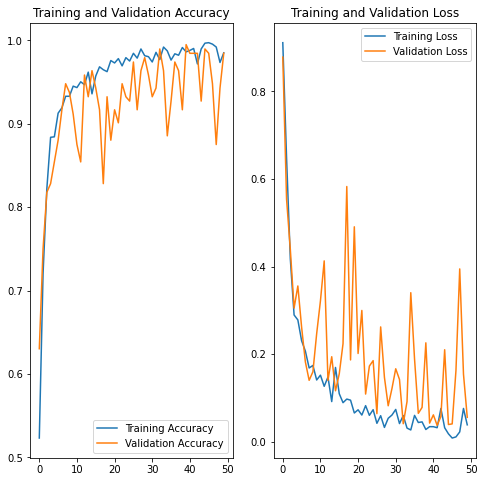

In [ ]:
plt.figure(figsize = (8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label= "Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label= "Validation Accuracy")
plt.legend(loc= "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Run prediction on sample image

first image to predict
actual label:  Potato___Late_blight
predicted label: Potato___Late_blight


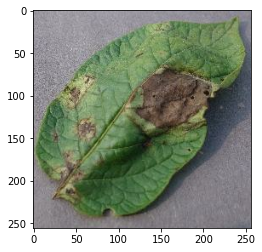

In [81]:
import numpy as np



for images_batch, labels_batch in test_ds.take(1):

  first_image = images_batch[0].numpy().astype("uint8")
  first_label = label_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label: ", class_names[first_label])

  batch_prediction = model.predict(image_batch)
  print("predicted label:", class_names[np.argmax(batch_prediction[0])])


function for inference

In [82]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)   # create a batch

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence =  round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

run inference on a few sample images

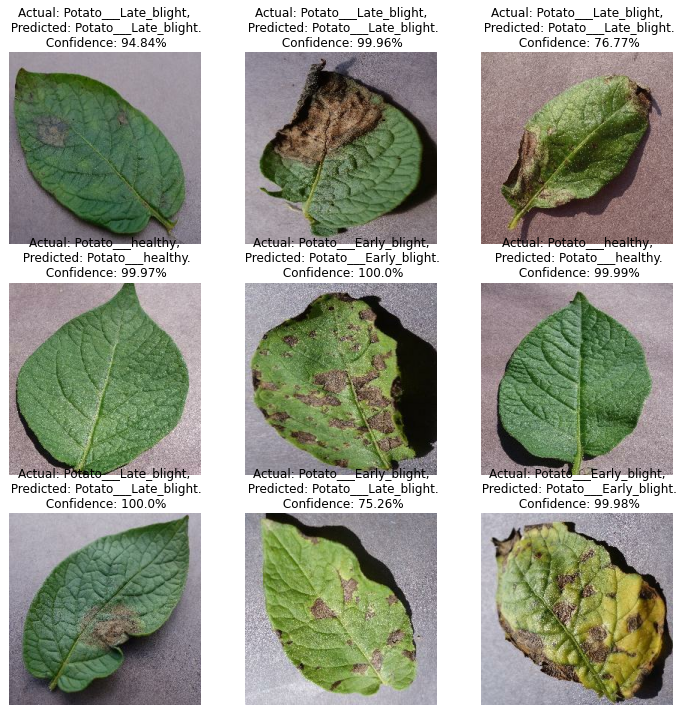

In [85]:
plt.figure(figsize = (12,12))

for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis("off")


Save model

In [86]:
model_version = 1
model.save(f"{model_version}")

INFO:tensorflow:Assets written to: 1/assets


In [87]:
# # automatically increase # of models

# import os
# model_version = max([int(i) for i in os.listdir("../models") + [0]]) + 1

In [88]:
# make same model for tomato classsification

In [92]:
!zip -r /content/1.zip /content/1

from google.colab import files
files.download("/content/1.zip")

  adding: content/1/ (stored 0%)
  adding: content/1/saved_model.pb (deflated 89%)
  adding: content/1/keras_metadata.pb (deflated 94%)
  adding: content/1/variables/ (stored 0%)
  adding: content/1/variables/variables.index (deflated 71%)
  adding: content/1/variables/variables.data-00000-of-00001 (deflated 12%)
  adding: content/1/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>